# <b> Predicting medical charges based on social demographic information </b>

## <b> Import Libraries </b>

In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, kstest

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## <b> Load Dataset </b>

In [7]:
dataframe = pd.read_csv('./assets/insurance.csv')
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## <b> Exploratory Analysis </b>

In [8]:
print(' ROWS & COLUMNS '.center(70, '-'))
print('Number of rows: {}'.format(dataframe.shape[0]))
print('Column Names: ' + ', '.join('{}'.format(col) for col in dataframe.columns.tolist()))
print(' COLUMN TYPES '.center(70, '-'))
print(dataframe.dtypes)
print(' NULLS '.center(70, '-'))
print(dataframe.isnull().sum())
print(' DUPLICATES '.center(70, '-'))
print(dataframe.duplicated().sum())

--------------------------- ROWS & COLUMNS ---------------------------
Number of rows: 1338
Column Names: age, sex, bmi, children, smoker, region, charges
---------------------------- COLUMN TYPES ----------------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
------------------------------- NULLS --------------------------------
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
----------------------------- DUPLICATES -----------------------------
1


In [16]:
# Understand how the data is distributed

dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


OBS: Charges is the only variable where mean != median. It is right skewed.

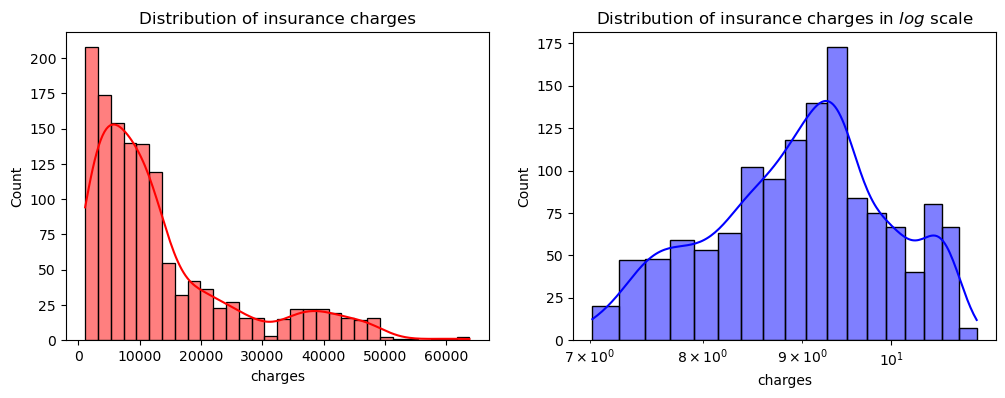

In [64]:
# Distribution of charges and its logarithmic form

f = plt.figure(figsize=(12,4))

ax1 = f.add_subplot(121)
sns.histplot(dataframe["charges"], color='r', kde=True)
ax1.set_title('Distribution of insurance charges')

ax2 = f.add_subplot(122)
sns.histplot(np.log(dataframe["charges"]), color='b', kde=True)
ax2.set_title('Distribution of insurance charges in $log$ scale')
ax2.set_xscale('log')

plt.show()

OBS: Applying a logarithmic transformation to the charges will help us normalize the variables and reduce the influence of extreme values

In [22]:
# If it follows a normal distribution we can apply a wider set of tests. Let's check.

shapiro_test = shapiro(np.log(dataframe["charges"]))
ks_test = kstest(np.log(dataframe["charges"]), 'norm')

if shapiro_test.pvalue > 0.05 or ks_test.pvalue > 0.05:
    print('It may follow a normal distribution')
else:
    print('It is not normally distributed')

It is not normally distributed


## <b> Outliers <b/>

Text(0.5, 1.0, 'Box plot for $log$ Charges')

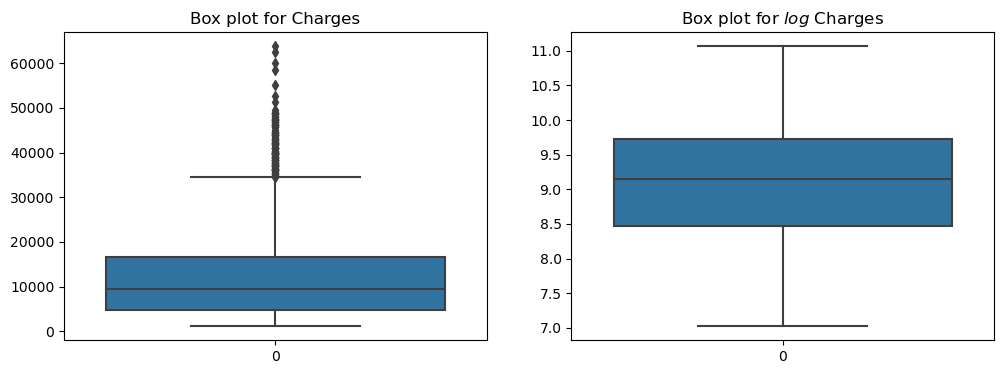

In [77]:
# Checking outliers for Charges and its logarithmic form

f = plt.figure(figsize=(12, 4))

ax1 = f.add_subplot(121)
sns.boxplot(dataframe["charges"])
ax1.set_title('Box plot for Charges')

ax2 = f.add_subplot(122)
sns.boxplot(np.log(dataframe["charges"]))
ax2.set_title('Box plot for $log$ Charges')


OBS: No outliers in the logarithmic form, not going to remove any

## <b>  Behaviour of the Charges across the independent variables </b>

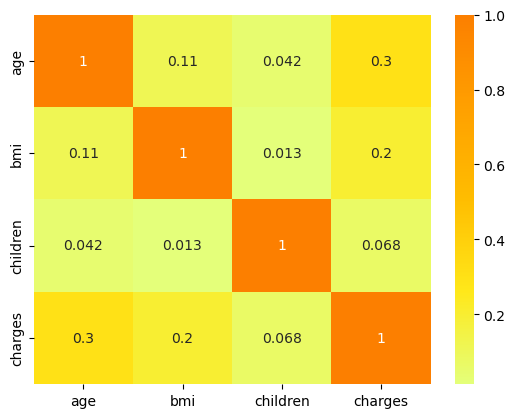

In [63]:
corr = dataframe.corr(numeric_only=True)
sns.heatmap(corr, cmap='Wistia', annot=True)

plt.show()

OBS: No strong correlation between independent variables. Slight positive correlation between age and bmi with charges.

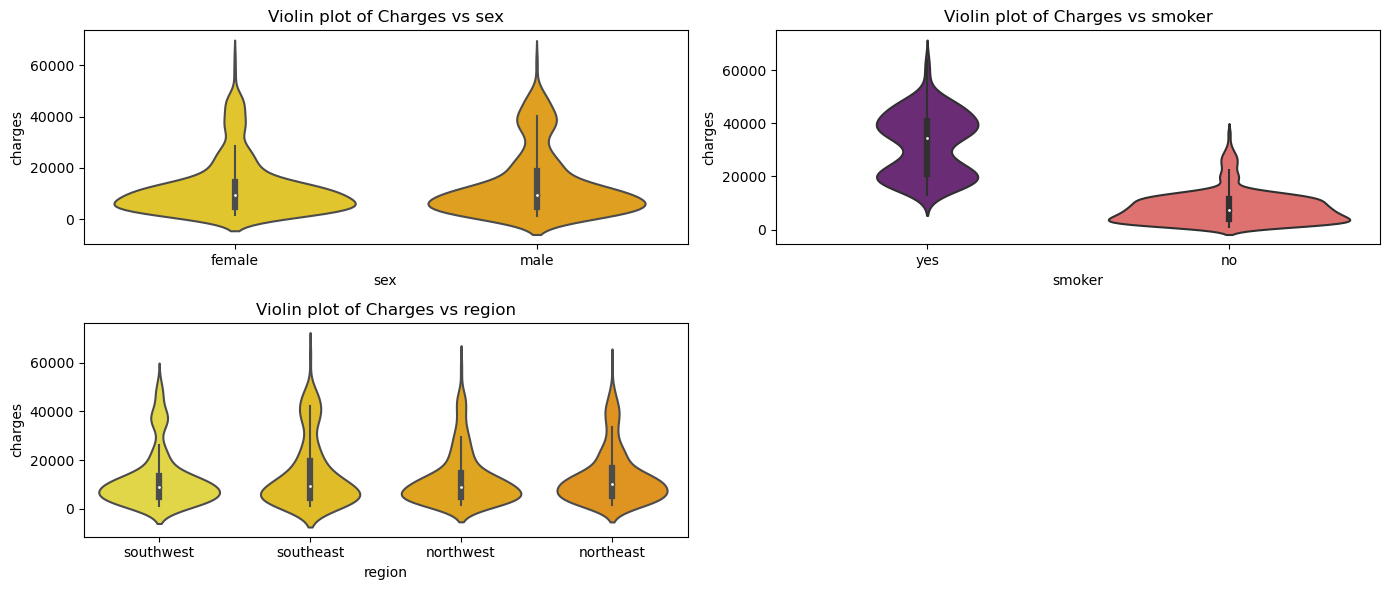

In [62]:
f = plt.figure(figsize=(14,6))
ax1 = f.add_subplot(221)
sns.violinplot(x="sex", y="charges", data=dataframe, palette='Wistia', ax=ax1)
ax1.set_title('Violin plot of Charges vs sex')

ax2 = f.add_subplot(222)
sns.violinplot(x="smoker", y="charges", data=dataframe, palette='magma', ax=ax2)
ax2.set_title('Violin plot of Charges vs smoker')

ax = f.add_subplot(223)
sns.violinplot(x="region", y="charges", data=dataframe, palette='Wistia', ax=ax)
ax.set_title('Violin plot of Charges vs region')

plt.tight_layout()
plt.show()

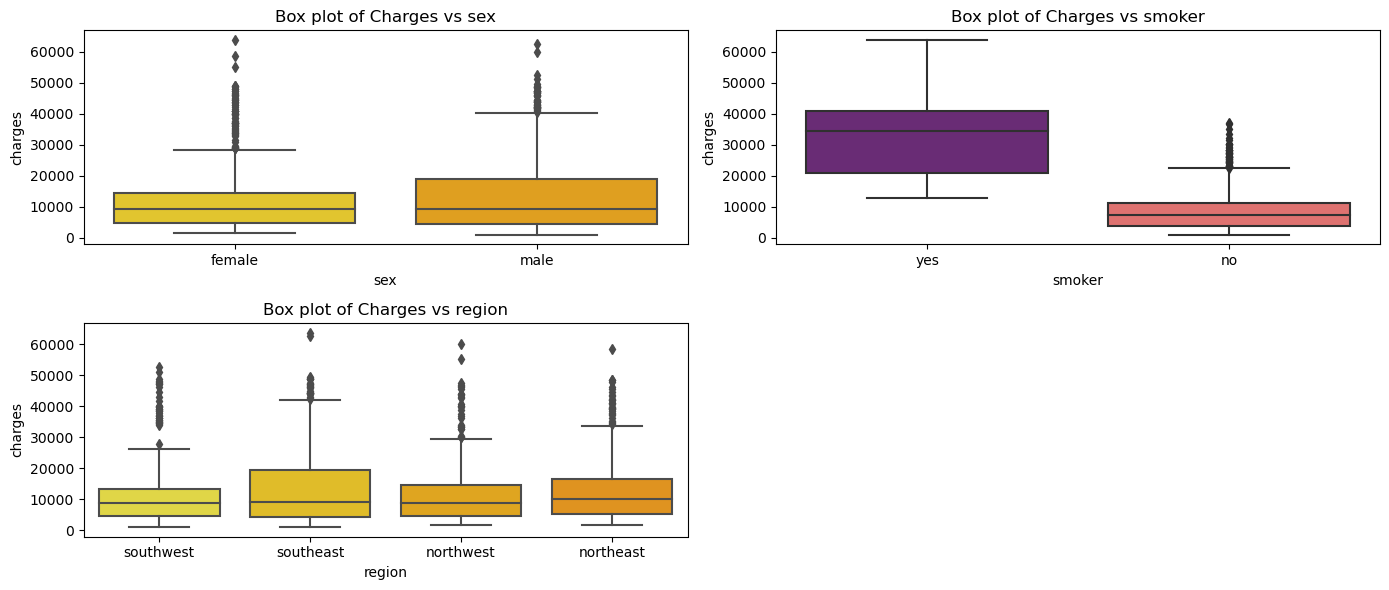

In [61]:
f = plt.figure(figsize=(14,6))
ax1 = f.add_subplot(221)
sns.boxplot(x="sex", y="charges", data=dataframe, palette='Wistia', ax=ax1)
ax1.set_title('Box plot of Charges vs sex')

ax2 = f.add_subplot(222)
sns.boxplot(x="smoker", y="charges", data=dataframe, palette='magma', ax=ax2)
ax2.set_title('Box plot of Charges vs smoker')

ax3 = f.add_subplot(223)
sns.boxplot(x="region", y="charges", data=dataframe, palette='Wistia', ax=ax3)
ax3.set_title('Box plot of Charges vs region')

plt.tight_layout()
plt.show()

OBS: There is a clear difference in the charges distribution for smoker.
Let's compare the other variables, controlling by smoker.

/var/folders/wn/q5pl90655r72g92rzntg9shh0000gp/T/ipykernel_46878/52796328.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="bmi", y="charges", data=dataframe, palette='viridis')


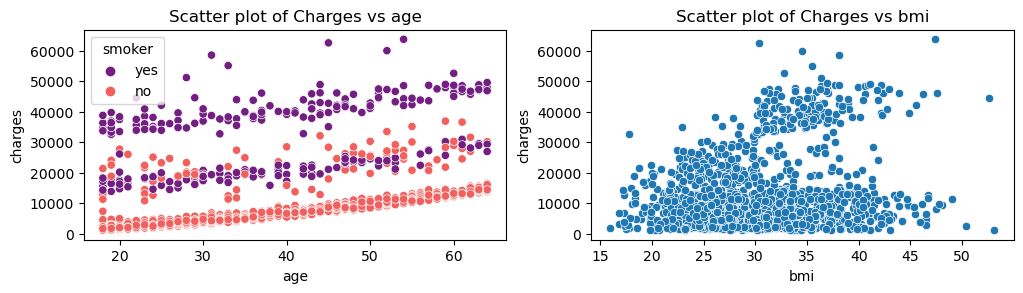

In [51]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(221)
sns.scatterplot(x="age", y="charges", data=dataframe, palette='magma', hue="smoker")
ax1.set_title('Scatter plot of Charges vs age')

ax2 = f.add_subplot(222)
sns.scatterplot(x="bmi", y="charges", data=dataframe, palette='viridis')
ax2.set_title('Scatter plot of Charges vs bmi')

plt.show()

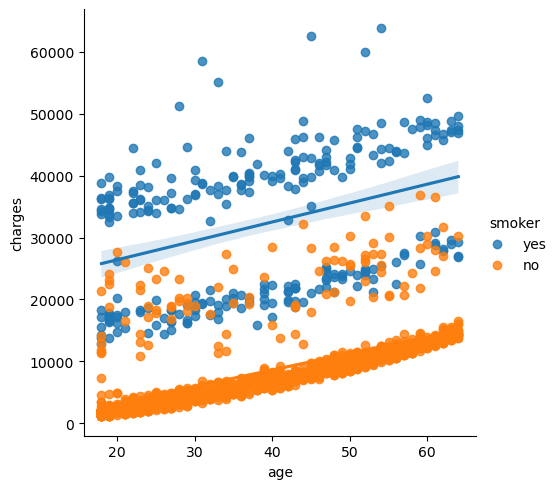

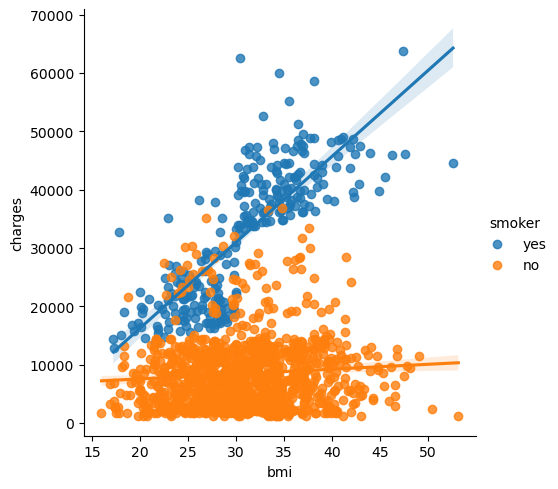

In [53]:

sns.lmplot(x="age", y="charges", data=dataframe, hue="smoker")
sns.lmplot(x="bmi", y="charges", data=dataframe, hue="smoker")

OBS: Linear regression plots show completely different trends for smoker vs no smoker

## <b> Transforming variables </b>

In [54]:
# Categorical variables into dummies

categorical_columns = ["sex", "children", "smoker", "region"]
dataframe_with_dummies = pd.get_dummies(
    data = dataframe,
    prefix = 'dummy',
    prefix_sep='_',
    columns = categorical_columns,
    drop_first =True,
    dtype='int8'
)

dataframe_with_dummies.head()

,age,bmi,charges,dummy_male,dummy_1,dummy_2,dummy_3,dummy_4,dummy_5,dummy_yes,dummy_northwest,dummy_southeast,dummy_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [55]:
# Charges into its logarithmic form

dataframe_with_dummies['charges'] = np.log(dataframe_with_dummies['charges'])

# <b> Linear Regression </b>

In [59]:
# Generate training and test sets

X = dataframe_with_dummies.drop('charges',axis=1)
y = dataframe_with_dummies['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Linear Regression training and prediction

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred = lin_reg.predict(X_test)

In [72]:
# R Squared
r_square = lin_reg.score(X_test, y_test)

print('R square obtain for Linear Regression is : {}.'.format(r_square))
print('The Mean Square Error is: {}.'.format(mean_squared_error(y_pred, y_test)))

R square obtain for Linear Regression is : 0.7844372891704954.
The Mean Square Error is: 0.1805122975889313.


## <b> Validating Linear Regression assumptions </b>

Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

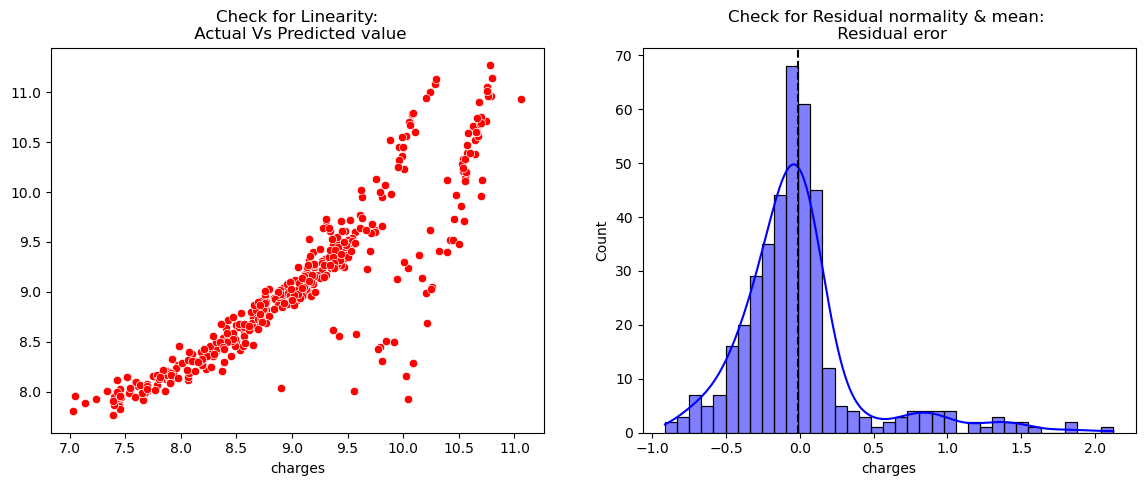

In [71]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred),ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual error')

Text(0.5, 1.0, 'Check for Homoscedasticity: \nResidual Vs Predicted')

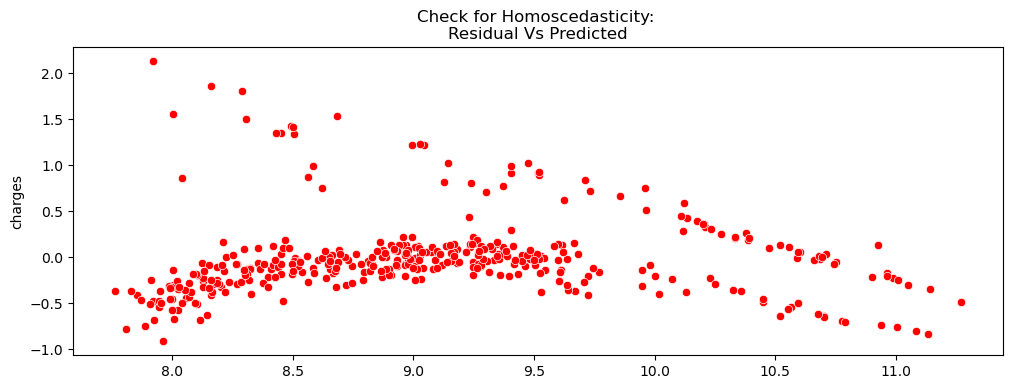

In [86]:
#Check for Homoscedasticity

f = plt.figure(figsize=(12,4))

ax = f.add_subplot(111)
sns.scatterplot(y = (y_test - y_pred), x= y_pred, color='r') 
ax.set_title('Check for Homoscedasticity: \nResidual Vs Predicted')

## <b> Final remarks </b>
The model doesn't meet the assumptions shown above:  

1. In our model the actual vs predicted plot is curve so linear assumption fails.  
2. The residual mean is zero and residual error plot right skewed, so the residuals are not normally distributed.  
3. The third plot shows that the variance of the residuals is not constant.